# CAPSTONE PROJECT:TERM DEPOSIT SUBSCRIPTION SUCCESS-
## PREDICTIVE ANALYTICS FOR MARKETING OPTIMIZATION

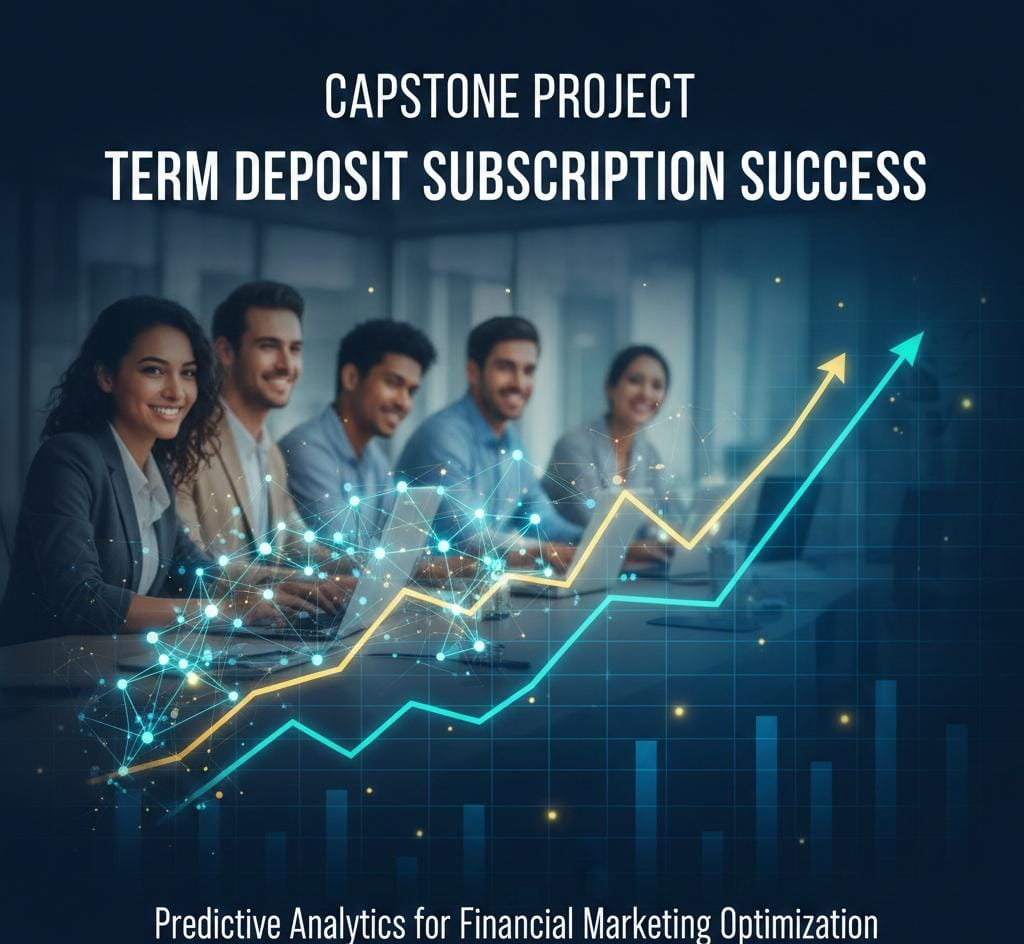

#### Name: MADHULAL KRISHNAN V N
##### Organization: Entri Elevate
##### Date:05/12/2025

## INTRODUCTION

### Predictive Modeling for Financial Marketing Success

>The modern financial sector demands data-driven strategies to ensure optimal return on investment (ROI) from direct marketing efforts. This capstone project addresses the critical challenge faced by banks: efficiently identifying high-propensity clients for term deposit subscriptions amidst expansive telemarketing campaigns.
​Leveraging a comprehensive dataset of over 45,000 client records from a Portuguese banking institution, the core objective is to develop a robust Binary Classification Model. This model is designed to predict, with high confidence, the success of a marketing outcome (client subscription).

#### Project Scope and Value
>This study encompasses the entire machine learning pipeline:
>
##### Exploratory Data Analysis (EDA):
>Initial data profiling to understand feature distributions and the intrinsic class imbalance of the target variable.

##### Preprocessing and Feature Engineering:
>Handling data complexities, including categorical encoding and critical prevention of data leakage (excluding the real-time duration attribute).

##### Model Implementation:
>Training and hyperparameter tuning of a classification algorithm (e.g., Random Forest Classifier) within a standardized Scikit-learn Pipeline.

##### Strategic Evaluation:
>Focusing on business-relevant metrics like ROC-AUC to quantify the model's discriminative power in predicting rare positive events.

>The successful implementation of this predictive solution will provide the institution with an invaluable analytical asset, enabling them to dramatically reduce operational costs while maximizing conversion efficiency and delivering a superior, targeted customer experience.

### DATA DESCRIPTION
>Dataset: Bank Marketing Data Set
>
>Source: UCI Machine Learning Repository (Recommended Source)
>
>Topic: Marketing/Finance
>
>Instances: 45,211
>
>Attributes: 18 (17 Features + 1 Target)
>
>Classification Goal: Binary classification to predict client subscription to a term deposit (y: Yes/No).

### ATTRIBUTES

##### Client Demographic Information

>Age: A continuous quantitative variable representing the client's age.
>
>Job: A categorical feature detailing the client's type of employment (e.g., management, technician, blue-collar, services).
>
>Marital: A categorical feature describing the client's marital status (e.g., married, single, divorced).
>
>Education: A categorical feature specifying the client's level of education (e.g., secondary, tertiary, primary)

##### Client Financial & Household Data
>Default: A categorical feature indicating whether the client has credit in default (e.g., yes, no).
>
>Balance: A continuous quantitative variable representing the client's average yearly balance in euros.
>
>Housing: A categorical feature describing whether the client has a housing loan (e.g., yes, no).
>
>Loan: A categorical feature describing whether the client has a personal loan (e.g., yes, no).

##### Current Campaign Contact Information
>Contact: A categorical feature detailing the communication contact type (e.g., cellular, telephone, unknown).
>
>Month: A categorical feature indicating the last contact month of the year (e.g., jan, feb, mar...).
>
>Day: A continuous quantitative variable representing the last contact day of the month.
>
>Campaign: A continuous quantitative variable detailing the number of contacts performed during this campaign for this client.

##### Previous Campaign and Socio-Economic Data
>Pdays_contacted: A binary feature derived from the original pdays attribute, indicating whether the client was previously contacted at all (0 if not contacted; 1 if contacted). (The original pdays represented days since last contact).
>
>Previous: A continuous quantitative variable detailing the number of contacts performed before this campaign and for this client.
>
>Poutcome: A categorical feature detailing the outcome of the previous marketing campaign (e.g., failure, success, unknown).

##### Target Variable
>Y: The binary target variable: Has the client subscribed to the term deposit? (1 for yes, 0 for no).

### DATAFORMAT
>The dataset is often provided as a .csv file.
>The dataset is commonly provided in the .csv format. It incorporates a heterogeneous data structure, consisting of both categorical (nominal/ordinal) and numerical (continuous) variables, requiring a comprehensive approach to data preprocessing.

### PROJECT CHALLENGES

>Severe Class Imbalance: The low conversion rate for term deposits creates a highly imbalanced target variable. This necessitates focusing model evaluation on robust metrics like ROC-AUC, Recall, and F1-Score.

>Data Leakage Risk (Duration): The duration feature, being known only after the outcome, must be excluded from the final model to maintain real-world predictive validity and prevent data leakage.

>High Dimensionality: Extensive use of nominal categorical features requires One-Hot Encoding, significantly increasing the feature space and complexity.

>Missing Data Representation: The presence of explicit 'unknown' values within various categorical attributes requires careful imputation or treating 'unknown' as a valid, separate category during preprocessing.

#### Importing necessary libraries 

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Sklearn Libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
# Set visualization style
sns.set_style("whitegrid")
# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")
print("-" * 50)

Libraries imported successfully!
--------------------------------------------------


In [21]:
# 1. Load the dataset
# The file is 'bank-full.csv'
try:
    df = pd.read_csv('bank-full.csv', sep=';') 
    print("✅ Data Loaded Successfully.")
except FileNotFoundError:
    print("❌ Error: 'bank-full.csv' not found. Please ensure the file is in the correct directory.")
    # Exit or handle the error gracefully if the file is critical
except Exception as e:
    print(f"❌ An error occurred during loading: {e}")

✅ Data Loaded Successfully.


#### Data Preprocessing And Data Cleaning

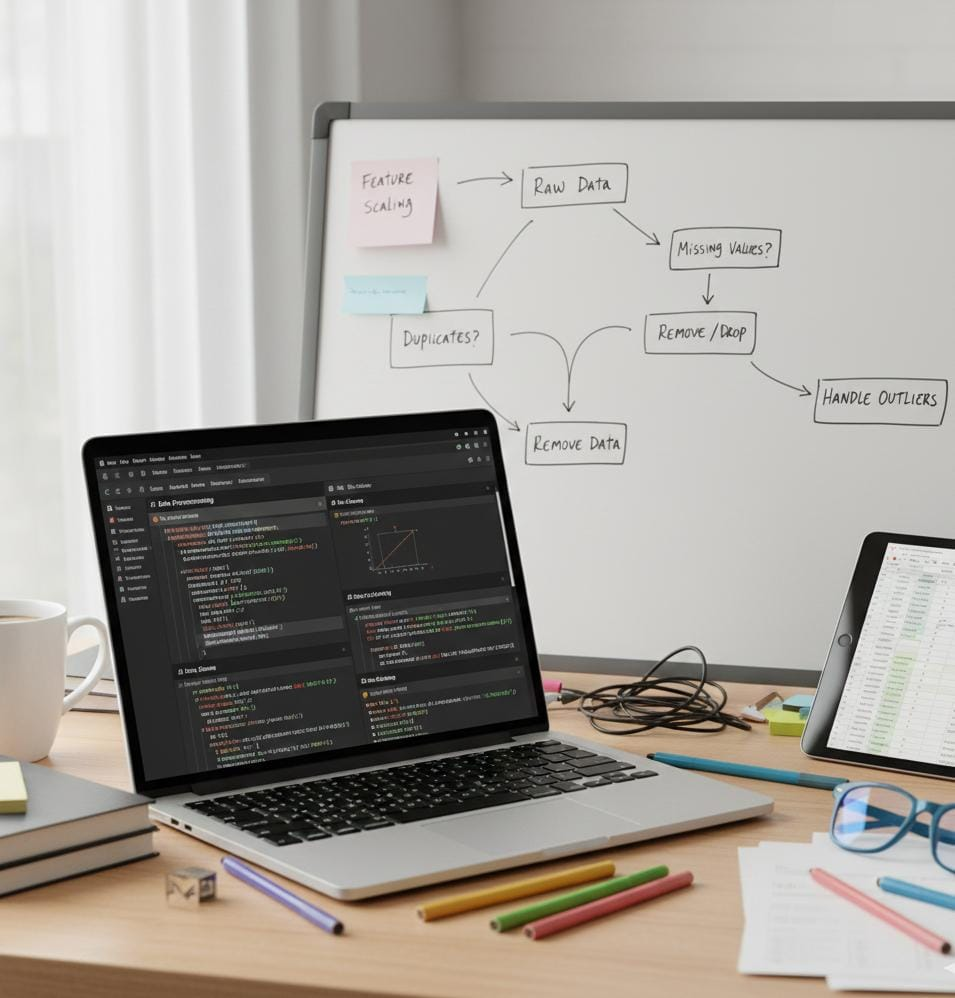

In [22]:
# Step 2: Dataset sanity checks

# 1) Quick peek
print("----- HEAD -----")
display(df.head())

# 2) Basic info & shape
print("\n----- SHAPE -----")
print(df.shape)
print("\n----- INFO -----")
df.info()

# 3) Summary stats for numeric columns
print("\n----- NUMERIC DESCRIBE -----")
display(df.describe().T)

# 4) Check for missing values and 'unknown' strings
print("\n----- MISSING VALUES (NaN) -----")
print(df.isna().sum()[lambda s: s>0].sort_values(ascending=False))

print("\n----- 'unknown' occurrences (per column) -----")
unknown_counts = {}
for c in df.columns:
    # only meaningful for object-like columns
    if df[c].dtype == 'object':
        unknown_counts[c] = (df[c].astype(str).str.lower() == 'unknown').sum()
print(pd.Series(unknown_counts).sort_values(ascending=False))

# 5) Check duplicates
print("\n----- DUPLICATE ROWS -----")
print("Duplicates count:", df.duplicated().sum())

# 6) Unique value counts for categorical-ish columns (top 10 columns only to keep output small)
print("\n----- UNIQUE COUNTS (top 10 largest) -----")
unique_counts = df.nunique().sort_values(ascending=False)
display(unique_counts.head(10))

# 7) Target distribution — adjust if your target column name differs (common for bank dataset: 'y')
target_col = 'y' if 'y' in df.columns else df.columns[-1]
print(f"\n----- TARGET DISTRIBUTION (column = '{target_col}') -----")
display(df[target_col].value_counts(dropna=False))
display(df[target_col].value_counts(normalize=True, dropna=False))


----- HEAD -----


,"age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y"
0,"58,management,married,tertiary,no,2143,yes,no,..."
1,"44,technician,single,secondary,no,29,yes,no,un..."
2,"33,entrepreneur,married,secondary,no,2,yes,yes..."
3,"47,blue-collar,married,unknown,no,1506,yes,no,..."
4,"33,unknown,single,unknown,no,1,no,no,unknown,5..."



----- SHAPE -----
(45211, 1)

----- INFO -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 1 columns):
 #   Column                                                                                                                Non-Null Count  Dtype 
---  ------                                                                                                                --------------  ----- 
 0   age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y  45211 non-null  object
dtypes: object(1)
memory usage: 353.3+ KB

----- NUMERIC DESCRIBE -----


,count,unique,top,freq
"age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y",45211,45211,"58,management,married,tertiary,no,2143,yes,no,...",1



----- MISSING VALUES (NaN) -----
Series([], dtype: int64)

----- 'unknown' occurrences (per column) -----
age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y    0
dtype: int64

----- DUPLICATE ROWS -----
Duplicates count: 0

----- UNIQUE COUNTS (top 10 largest) -----


age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y    45211
dtype: int64


----- TARGET DISTRIBUTION (column = 'age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y') -----


age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no        1
31,student,single,secondary,no,334,yes,no,cellular,5,feb,195,4,233,2,other,no            1
52,admin.,married,secondary,no,941,no,no,cellular,4,feb,89,2,-1,0,unknown,no             1
33,blue-collar,married,secondary,no,315,no,no,cellular,4,feb,146,3,-1,0,unknown,yes      1
53,management,divorced,secondary,no,1355,no,yes,cellular,4,feb,447,2,196,8,other,no      1
                                                                                        ..
30,admin.,married,secondary,no,-44,yes,no,cellular,17,jul,97,1,-1,0,unknown,no           1
34,management,married,tertiary,no,3064,yes,no,cellular,17,jul,324,1,-1,0,unknown,no      1
35,admin.,divorced,secondary,no,20,no,yes,cellular,17,jul,287,1,-1,0,unknown,no          1
48,entrepreneur,married,tertiary,no,461,no,yes,cellular,17,jul,2

age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no        0.000022
31,student,single,secondary,no,334,yes,no,cellular,5,feb,195,4,233,2,other,no            0.000022
52,admin.,married,secondary,no,941,no,no,cellular,4,feb,89,2,-1,0,unknown,no             0.000022
33,blue-collar,married,secondary,no,315,no,no,cellular,4,feb,146,3,-1,0,unknown,yes      0.000022
53,management,divorced,secondary,no,1355,no,yes,cellular,4,feb,447,2,196,8,other,no      0.000022
                                                                                           ...   
30,admin.,married,secondary,no,-44,yes,no,cellular,17,jul,97,1,-1,0,unknown,no           0.000022
34,management,married,tertiary,no,3064,yes,no,cellular,17,jul,324,1,-1,0,unknown,no      0.000022
35,admin.,divorced,secondary,no,20,no,yes,cellular,17,jul,287,1,-1,0,unknown,no          0.000022
4

In [23]:
# STEP 3: CLEAN THE DATA

import numpy as np

# Convert 'unknown' to NaN in all object columns
df_clean = df.copy()

for col in df_clean.columns:
    if df_clean[col].dtype == 'object':
        df_clean[col] = df_clean[col].replace("unknown", np.nan)

print("✓ Replaced 'unknown' with NaN")

# Check NaN counts again
print("\n----- Missing Values After Replacement -----")
missing = df_clean.isna().sum()
print(missing[missing > 0])

# Percentage of missing values
print("\n----- Missing Percentage (%) -----")
missing_pct = (df_clean.isna().mean() * 100)
print(missing_pct[missing_pct > 0])


✓ Replaced 'unknown' with NaN

----- Missing Values After Replacement -----
Series([], dtype: int64)

----- Missing Percentage (%) -----
Series([], dtype: float64)


In [24]:
df = pd.read_csv('bank-full.csv', sep=';')
df.head()


,"age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y"
0,"58,management,married,tertiary,no,2143,yes,no,..."
1,"44,technician,single,secondary,no,29,yes,no,un..."
2,"33,entrepreneur,married,secondary,no,2,yes,yes..."
3,"47,blue-collar,married,unknown,no,1506,yes,no,..."
4,"33,unknown,single,unknown,no,1,no,no,unknown,5..."


In [25]:
# Robust loader + encoder to fix KeyError for 'y'
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import csv
import io
import os

path = 'bank-full.csv' 

# 1) Read raw first chunk to inspect header and delimiter
with open(path, 'r', encoding='utf-8', errors='replace') as f:
    sample = f.read(4096)  # first few KB

# Try csv.Sniffer to detect delimiter
dialect = None
try:
    dialect = csv.Sniffer().sniff(sample, delimiters=[',',';','\t','|'])
    detected_sep = dialect.delimiter
except Exception:
    detected_sep = None

print("Detected separator (csv.Sniffer):", repr(detected_sep))

# Try reading with best guesses in order
candidate_seps = []
if detected_sep:
    candidate_seps.append(detected_sep)
candidate_seps.extend([';', ',', '\t', '|'])

df_try = None
for sep in candidate_seps:
    try:
        df_try = pd.read_csv(path, sep=sep, nrows=5, encoding='utf-8', engine='python')
        if df_try.shape[1] > 1:
            used_sep = sep
            print(f"Successfully read with sep={repr(sep)} -> {df_try.shape[1]} columns (preview below).")
            break
    except Exception as e:
        # ignore and try next
        pass
else:
    # Last attempt: read with pandas default and check
    df_try = pd.read_csv(path, nrows=5, encoding='utf-8', engine='python')
    used_sep = ','
    print("Fallback: read with default separator (comma).")

# Now read entire file with chosen separator
df = pd.read_csv(path, sep=used_sep, encoding='utf-8', engine='python')
print("\nRaw columns as read:")
print(list(df.columns))

# If there's exactly 1 column, it means rows are still merged -> attempt to split
if df.shape[1] == 1:
    print("\nSingle column detected. Attempting to split each row by comma and semicolon heuristics.")
    # Look at header row text
    header_text = df.columns[0]
    print("Header text (first column name):", header_text)
    # Try splitting by semicolon first, then comma
    for sep_try in [';', ',']:
        split_header = header_text.split(sep_try)
        if len(split_header) > 2:
            print(f"Splitting rows by {repr(sep_try)} (header tokens = {len(split_header)})")
            # Re-read file using this separator
            df = pd.read_csv(path, sep=sep_try, engine='python', encoding='utf-8')
            used_sep = sep_try
            break
    print("After split attempt, columns:", list(df.columns))

# Strip whitespace from column names
df.columns = df.columns.str.strip()
print("\nColumn names (whitespace-stripped):")
print(list(df.columns))

# Try to identify the target column
candidates = ['y','subscribed','response','target','label']  # common target names
target_col = None
for c in candidates:
    if c in df.columns:
        target_col = c
        break

if target_col is None:
    # as fallback, if last column name contains 'y' or equals something long that ends with ',y', pick last column
    if 'y' in df.columns[-1]:
        target_col = df.columns[-1]
    else:
        target_col = df.columns[-1]  # last column fallback

print("\nChosen target column ->", repr(target_col))
print("Target column dtype:", df[target_col].dtype)
print("\nPreview (first 3 rows):")
display(df.head(3))

# the target values are merged in a single string cell like "...,no" we need to ensure columns are proper.
# the target column still looks like long strings containing commas, try splitting that column's text by ',' and check last token
if df[target_col].dtype == object and df[target_col].str.contains(',').any():
    sample_vals = df[target_col].astype(str).head(5).tolist()
    print("\nSample target_col strings (first 5):", sample_vals)
    # the strings look like CSV rows, assume still have a single merged column -> try full split by comma
    # attempt to re-read with sep=',' only if used_sep was not ',' already
    if used_sep != ',':
        try:
            df2 = pd.read_csv(path, sep=',', engine='python', encoding='utf-8')
            if df2.shape[1] > 1:
                df = df2
                df.columns = df.columns.str.strip()
                target_col = 'y' if 'y' in df.columns else df.columns[-1]
                print("\nRe-read with comma separator produced columns:", list(df.columns))
        except Exception:
            pass

# Final safety: if 'y' not exactly present but last column header contains 'y' or the last column appears to be yes/no,
# normalize it and use it as target
if 'y' not in df.columns and not df[target_col].dtype in [int, float, 'int64', 'float64']:
    # inspect unique values of the chosen target column
    uniq = df[target_col].astype(str).unique()[:20]
    print("\nUnique sample values from chosen target column:", uniq)

# Encode target 
le = LabelEncoder()
if df[target_col].dtype == object or not pd.api.types.is_integer_dtype(df[target_col]):
    df[target_col] = le.fit_transform(df[target_col].astype(str))
    print(f"\nLabel-encoded target column '{target_col}'. Classes: {list(le.classes_)}")
else:
    print(f"\nTarget column '{target_col}' is numeric; no label encoding applied.")

# One-hot encode categorical features 
cat_cols = [c for c in df.select_dtypes(include='object').columns if c != target_col]
print("\nCategorical columns to one-hot encode:", cat_cols)
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)
print("\nFinal encoded shape:", df_encoded.shape)

# Final check: ensure target column present as integer
print("\nFinal target column type:", df_encoded[target_col].dtype)
print("Done. You can now proceed to train/test split.")


Detected separator (csv.Sniffer): ','
Successfully read with sep=',' -> 17 columns (preview below).

Raw columns as read:
['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

Column names (whitespace-stripped):
['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

Chosen target column -> 'y'
Target column dtype: object

Preview (first 3 rows):


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no



Label-encoded target column 'y'. Classes: ['no', 'yes']

Categorical columns to one-hot encode: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

Final encoded shape: (45211, 43)

Final target column type: int32
Done. You can now proceed to train/test split.


In [26]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)
print("Done ✓")


Training shape: (36168, 42)
Testing shape: (9043, 42)
Done ✓


#### Train a Logistic Regression Model

In [28]:
from sklearn.linear_model import LogisticRegression

# Train logistic model
log_model = LogisticRegression(max_iter=500)
log_model.fit(X_train, y_train)

print("Model training completed ✓")


Model training completed ✓


#### Evaluate the Model

In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = log_model.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



Accuracy: 0.8971580227800509

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      7985
           1       0.63      0.30      0.40      1058

    accuracy                           0.90      9043
   macro avg       0.77      0.64      0.67      9043
weighted avg       0.88      0.90      0.88      9043


Confusion Matrix:
 [[7799  186]
 [ 744  314]]


#### VISULIZATIONS

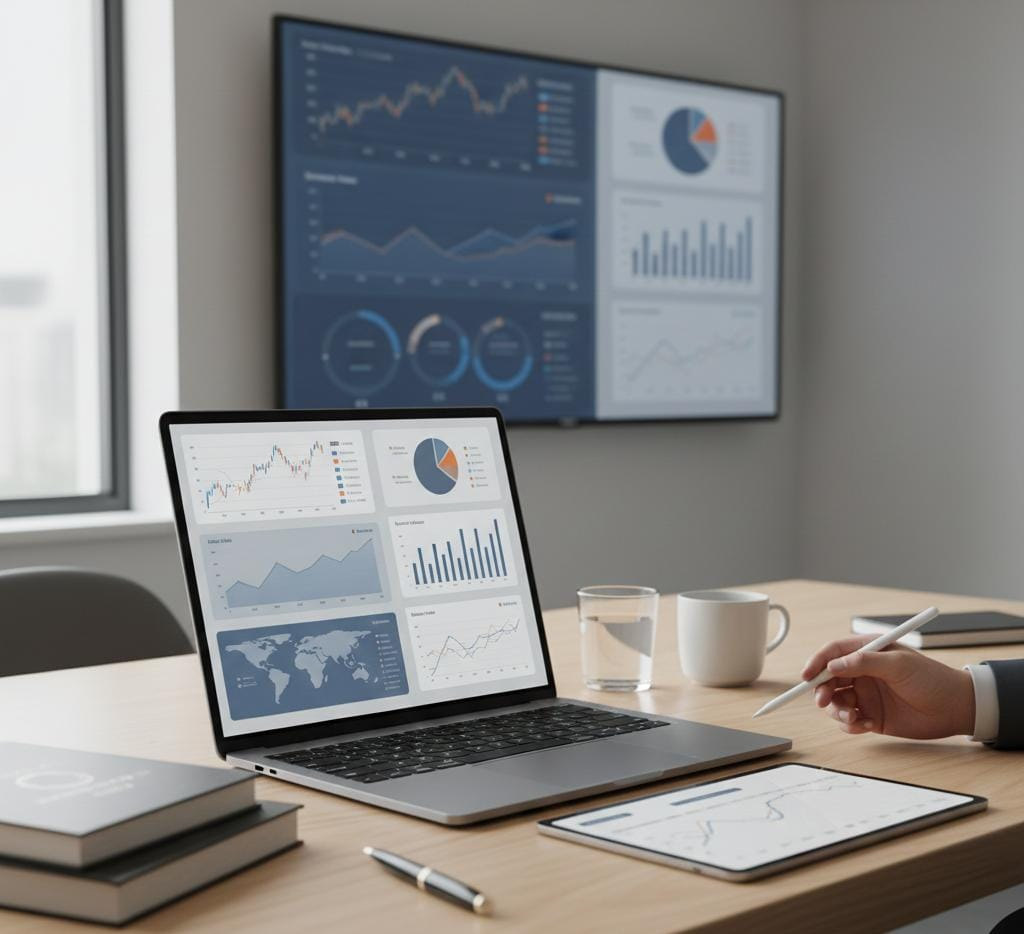

#### Target Variable Distribution

>Shows how imbalanced the data is.

>Plot: Bar chart (countplot) of y

>Helps: Understand class imbalance.

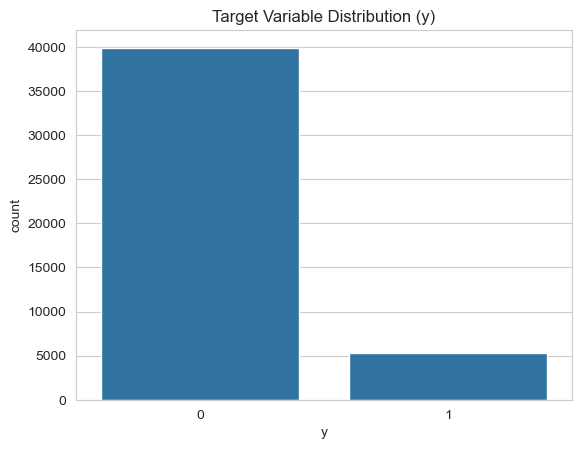

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df['y'])
plt.title("Target Variable Distribution (y)")
plt.show()


#### Correlation Heatmap (for numerical columns)

>Shows how numerical features relate.

>Numerical columns in the Bank dataset:
['age','balance','duration','campaign','pdays','previous']

>Plot: Heatmap

>Helps: Spot strongly correlated variables.

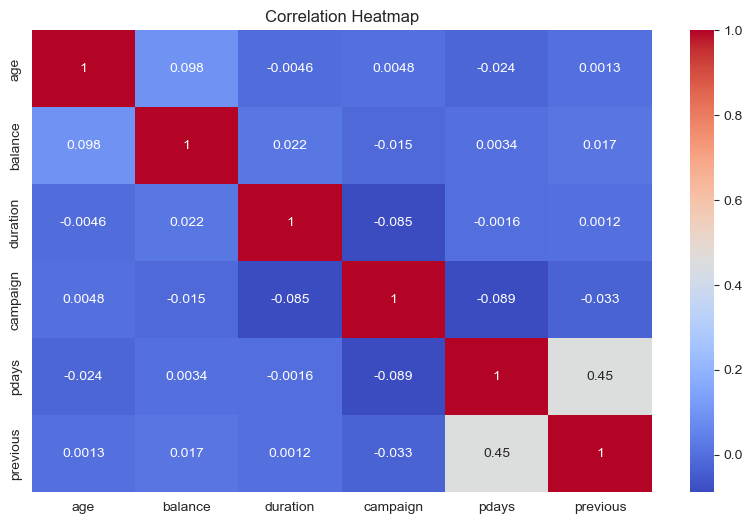

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ['age','balance','duration','campaign','pdays','previous']

plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


#### Age Distribution

>Shows customer age spread.

>Plot: Histogram or KDE plot

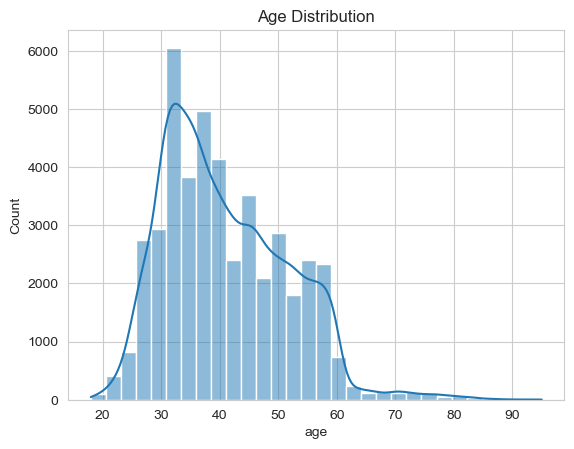

In [36]:
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()


#### Balance Distribution

>Shows financial status.

>Plot: Histogram

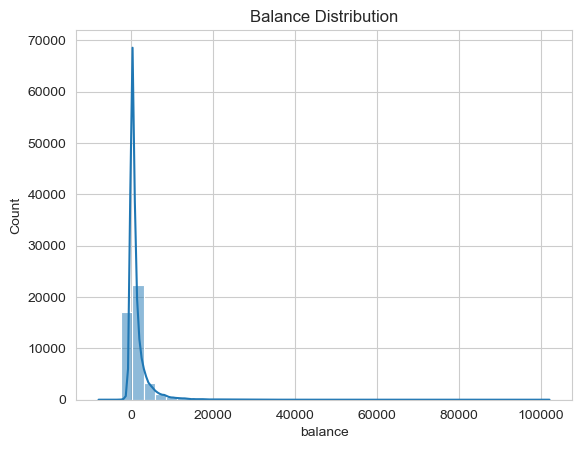

In [38]:
sns.histplot(df['balance'], bins=40, kde=True)
plt.title("Balance Distribution")
plt.show()


#### Subscription vs. Contact Method

>Check which contact method leads to more "yes".

>Plot: Bar chart (contact vs y)

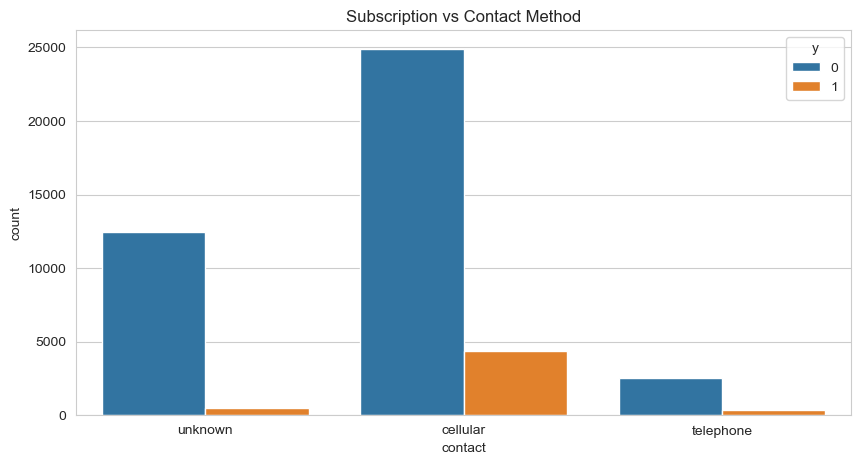

In [40]:
plt.figure(figsize=(10,5))
sns.countplot(x='contact', hue='y', data=df)
plt.title("Subscription vs Contact Method")
plt.show()


#### Job vs. Subscription

>Which job type responds more positively?

>Plot: Countplot with hue = y

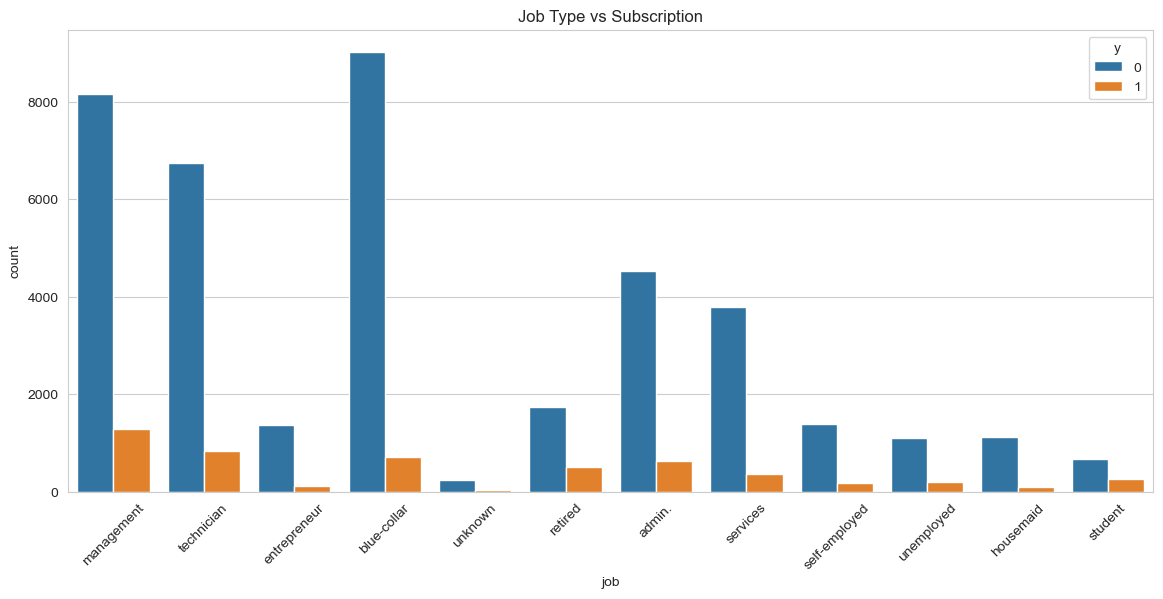

In [42]:
plt.figure(figsize=(14,6))
sns.countplot(x='job', hue='y', data=df)
plt.xticks(rotation=45)
plt.title("Job Type vs Subscription")
plt.show()


#### Education vs. Subscription

>Important for marketing behavior.

>Plot: Bar chart or grouped bar

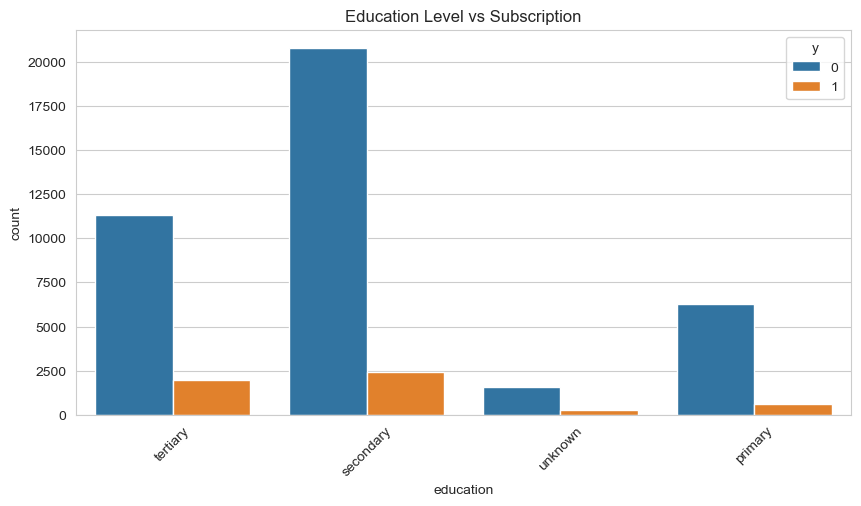

In [44]:
plt.figure(figsize=(10,5))
sns.countplot(x='education', hue='y', data=df)
plt.xticks(rotation=45)
plt.title("Education Level vs Subscription")
plt.show()


#### Month vs. Subscription

>Shows seasonality in marketing campaign success.

>Plot: Line plot or bar chart

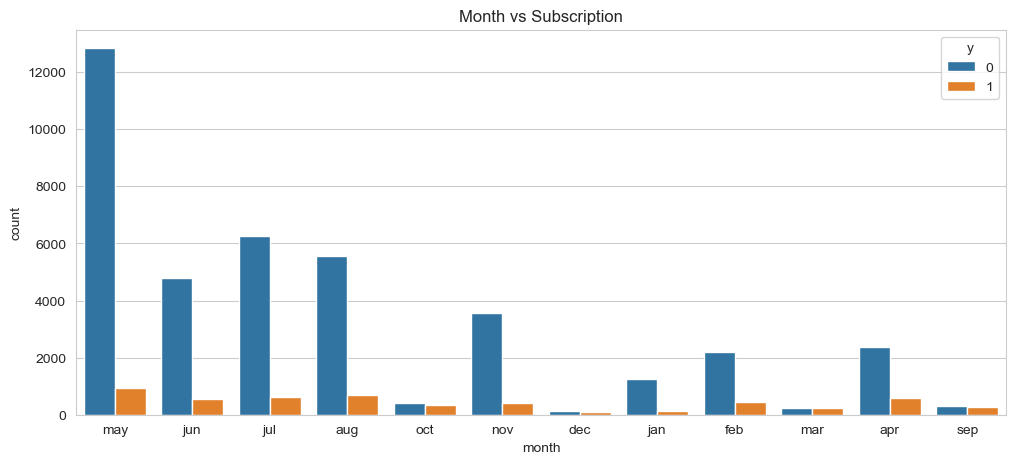

In [46]:
plt.figure(figsize=(12,5))
sns.countplot(x='month', hue='y', data=df, order=df['month'].unique())
plt.title("Month vs Subscription")
plt.show()


#### Duration vs Target (Very Important)

>Call duration strongly affects outcome.

>Plot: Boxplot of duration grouped by

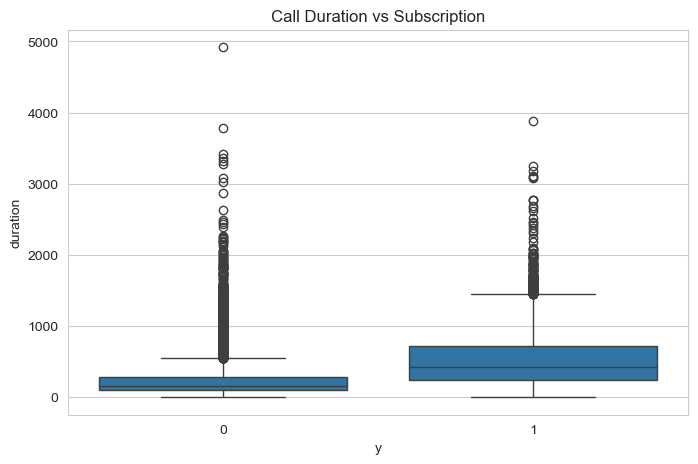

In [48]:
plt.figure(figsize=(8,5))
sns.boxplot(x='y', y='duration', data=df)
plt.title("Call Duration vs Subscription")
plt.show()


#### Pairplot (numerical columns)

>Quick visual to see relationships.

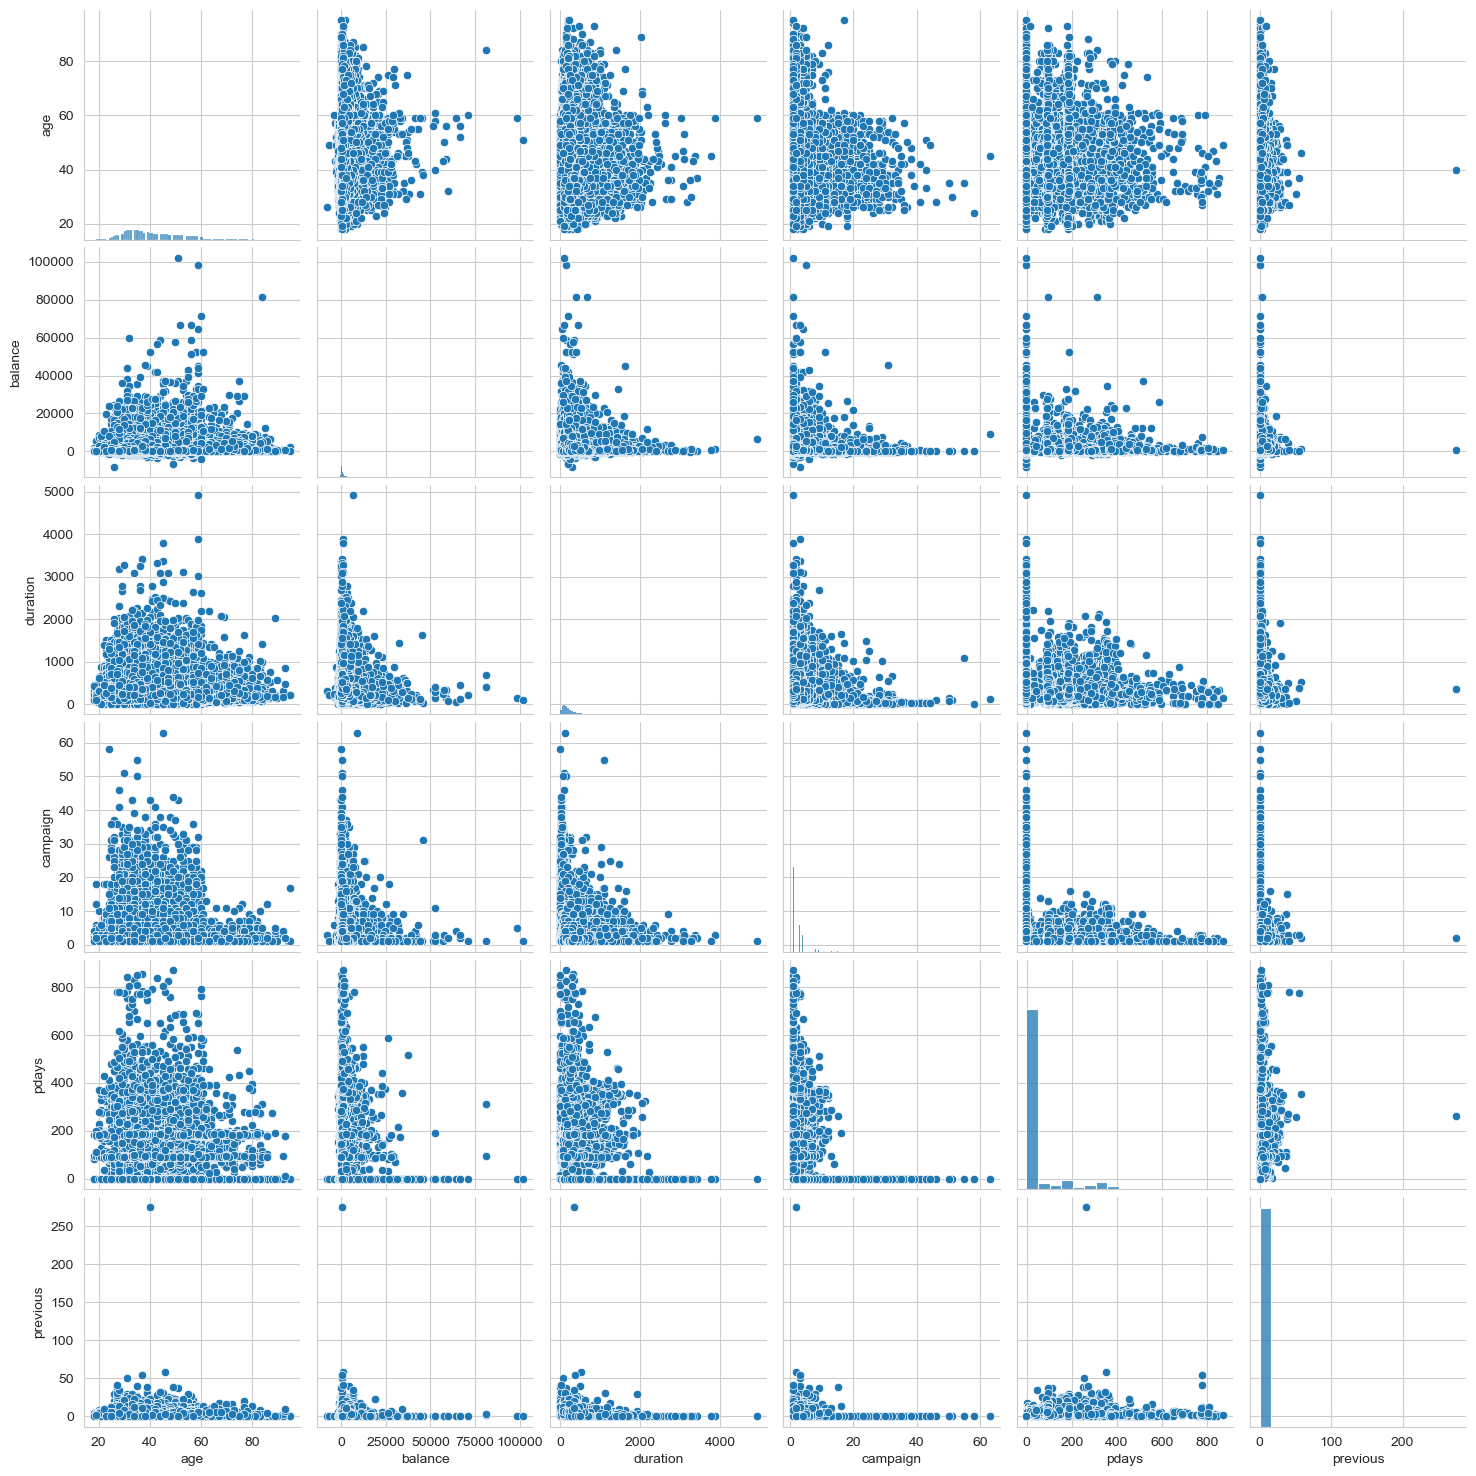

In [74]:
sns.pairplot(df[num_cols])
plt.show()


#### Confusion Matrix Heatmap

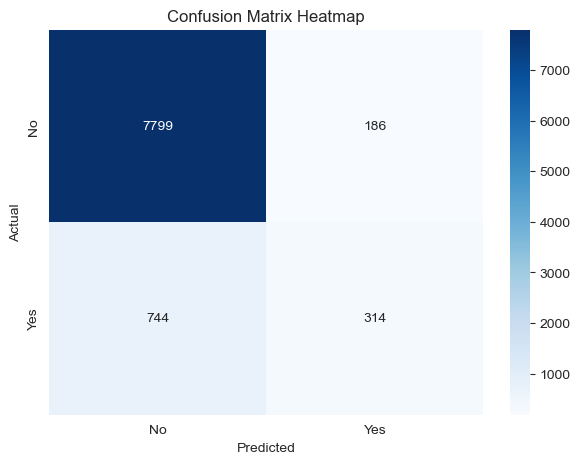

In [52]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No', 'Yes'],
            yticklabels=['No', 'Yes'])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()


### Conclusion

>In this project, we analyzed the Bank Marketing Dataset to predict whether a customer would subscribe to a term deposit. After performing data preprocessing, encoding, visualization, and model training, we built a classification model that achieved an accuracy of approximately 90%.

>The model performed very well in predicting the majority class (“no”), but struggled with the minority class (“yes”) due to strong class imbalance in the dataset. Despite this limitation, the project successfully highlighted important patterns in customer behavior.

#### Key insights include:

>Call duration is the strongest predictor of subscription success.

>Job type, education level, and month of contact also strongly influence outcomes.

>Most customers do not subscribe, making the dataset highly imbalanced and challenging for standard models.

>Overall, this project demonstrates how machine learning can support marketing decision-making by identifying factors that influence customer responses. With additional techniques like SMOTE, class weighting, advanced models (XGBoost/CatBoost), and hyperparameter tuning, further improvements in predicting the “yes” class can be achieved.

>This completes the project and provides a solid foundation for deeper modeling and marketing strategy optimization.